# Data Cleaning

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/_main_Colab Notebooks/data/SG MH Tweets')

In [2]:
import pandas as pd
import numpy as np
import glob
from tqdm.notebook import tqdm
import re
pd.options.display.max_columns = 38


Cleaning Notes:
- Since the goal of the project is NLP, we ignore all the meta data and only retain the following columns: `id`, `date`, `tweet`, `language`, `hashtags`, `user_id`, `search`, and `place` Only `user_id` is retained to ensure anonymity of the user.
- `language` is used to filter all "english" tweets, `hashtags` and `search` are used to identify whether the tweet contains the keywords identified by the team, and `place` (lat and long) are used to determine the geo-location of the tweet (if Singapore or Johor). 
- `src` column was created to track where the data came from. 
- Performed preliminary cleaning on `tweets` column by removing urls (http:/...) and mentions (@...)

## Drop Irrelevant Columns

In [3]:
def load_data(fp='./mh-keywords-19.csv'):
    df = pd.read_csv(fp, engine='python')
    cols = ['id', 'user_id', 'date', 'tweet', 'language', 'hashtags', 
            'search', 'place']
    df = df.loc[:, cols]
    df.date = pd.to_datetime(df.date)
    df['latitude'] = df.place.map(lambda x:  eval(x)['coordinates'][0]
                                  if not pd.isnull(x) else x)
    df['longitude'] = df.place.map(lambda x:  eval(x)['coordinates'][1] 
                                   if not pd.isnull(x) else x)
    df['src'] = fp
    df.drop('place', 1, inplace=True)
    return (df.loc[df.language=='en']
              .rename(columns=dict(language='lang', id='tweet_id',
                                   search='search_keyword')))

In [4]:
fps = glob.glob('./*-keywords-*.csv')
dfs = []
for fp in tqdm(fps):
    dfs.append(load_data(fp))
df = pd.concat(dfs).reset_index(drop=True)

## Cleaning the tweet

In [5]:
def remove_hyperlinks(text):
    ptn = r'(https://[\w./-]+)|(www.[\w./-]+)|([\w./-]+.com)'
    return re.sub(ptn, '', text)

def remove_mentions(text):
    ptn = r'(@[\w_]+)'
    return re.sub(ptn, '', text)

def clean_text(text, hyperlink=True, mention=True, stopwords=False,
               punctuations=False, contractions=False, digits=False,
               lowercase=True):
    if hyperlink: # Remove Hyperlinks
        text = remove_hyperlinks(text)
    if mention: # Remove Mentions
        text = remove_mentions(text)
    if stopwords: # Remove english stopwords
        pass
    if punctuations: # Remove Punctuations 
        pass 
    if contractions: # Expand Contractions e.g. can't -> cannot
        pass
    if digits: # Remove all numbers
        pass
    if lowercase: # Transform to lowercase
        text = text.lower()
    return text

df['clean_tweet'] = df.tweet.map(clean_text)
df = df.rename(columns=dict(tweet='raw_tweet'))

In [6]:
df

,tweet_id,user_id,date,raw_tweet,lang,hashtags,search_keyword,latitude,longitude,src,clean_tweet
0,1.340000e+18,4.350347e+07,2020-12-09 15:39:00,One of the men thought I was 22 (thank you so ...,en,[],self-esteem,NaN,NaN,./mh-keywords-20.csv,one of the men thought i was 22 (thank you so ...
1,1.340000e+18,2.378525e+09,2020-12-07 17:50:00,ego be skyhigh but self esteem be lower than t...,en,[],self-esteem,NaN,NaN,./mh-keywords-20.csv,ego be skyhigh but self esteem be lower than t...
2,1.330000e+18,8.600000e+17,2020-12-03 08:04:00,Congrats my self esteem dropped to -76.8%,en,[],self-esteem,NaN,NaN,./mh-keywords-20.csv,congrats my self esteem dropped to -76.8%
3,1.330000e+18,1.310000e+18,2020-11-25 22:36:00,"i wanna sing but like ???insecurities???, ???l...",en,[],self-esteem,NaN,NaN,./mh-keywords-20.csv,"i wanna sing but like ???insecurities???, ???l..."
4,1.330000e+18,7.620000e+17,2020-11-10 22:12:00,hving low self esteem my whole life isnt a bad...,en,[],self-esteem,NaN,NaN,./mh-keywords-20.csv,hving low self esteem my whole life isnt a bad...
...,...,...,...,...,...,...,...,...,...,...,...
91565,1.353960e+18,7.089070e+17,2021-01-26 15:02:00,Your Covid care speech drove us to be frontlin...,en,[],frontline,NaN,NaN,./pk-keywords-21.csv,your covid care speech drove us to be frontlin...
91566,1.352840e+18,3.529735e+07,2021-01-23 12:41:00,"I know it's still early days, but India seems ...",en,[],frontline,NaN,NaN,./pk-keywords-21.csv,"i know it's still early days, but india seems ..."
91567,1.350350e+18,3.749922e+08,2021-01-16 15:50:00,PM gets emotional while speaking about invalua...,en,[],frontline,NaN,NaN,./pk-keywords-21.csv,pm gets emotional while speaking about invalua...
91568,1.350310e+18,8.773371e+08,2021-01-16 13:31:00,Nation pays its debt for their sacrifice today...,en,"['respect', 'kudos', 'healthcareheroes', 'larg...",frontline,NaN,NaN,./pk-keywords-21.csv,nation pays its debt for their sacrifice today...


## Check if the tweet is from Singapore (using Latitude and Longitude)

Steps:
1. Obtain the MULTIPOLYGON of Singapore using OSMNX. `Singapore`
2. Convert `df` to a geodataframe using `latitude` and `longitude` as basis of geometry.
4. Check if the tweets is "Within" the `singapore` geometry. Drop tweets that are found outside the geometry. 


In [7]:
%%capture
pip install osmnx=='0.15.1' geopandas

In [8]:
import osmnx as ox
import geopandas as gpd
print('Version of OSMNx', ox.__version__)

Version of OSMNx 0.15.1


In [9]:
# Get the Geometry of Singapore
singapore = ox.gdf_from_place('Singapore')
singapore

/usr/local/lib/python3.7/dist-packages/osmnx/boundaries.py:36: UserWarning: The `boundaries` module has been deprecated and will be removed in a future relase. Use the `geocoder` module's `geocode_to_gdf` function instead.
  warnings.warn(msg)


,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"MULTIPOLYGON (((103.56667 1.19550, 103.57333 1...",Singapore,1.51316,1.130361,104.570679,103.566667


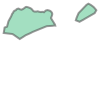

In [10]:
singapore.geometry[0]

In [13]:
gdf = gpd.GeoDataFrame(df, crs='EPSG:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))

# gdf1 contains tweets with geo location. gdf2 contains those without
gdf1 = gdf.dropna(subset=['latitude', 'longitude'])
gdf1 = gdf1.loc[gdf1.geometry.within(singapore.geometry[0])]
gdf2 = gdf[(gdf.latitude.isna())|(gdf.longitude.isna())]
df1 = gdf1.append(gdf2).drop('geometry', 1)
print('Old DataFrame Size:', df.shape)
print('New DataFrame Size:', df1.shape)

Old DataFrame Size: (91570, 12)
New DataFrame Size: (90990, 11)


In [16]:
df1.to_csv('2021-07-09-tweets-twint.csv', index=False)

In [17]:
df1

,tweet_id,user_id,date,raw_tweet,lang,hashtags,search_keyword,latitude,longitude,src,clean_tweet
57,1.320000e+18,1.923584e+09,2020-11-01 11:07:00,Everything from DEPRESSION vol 5 #depressiontr...,en,"['depressiontribe', 'depressionsg', 'sectsshop...",depression,1.30096,103.83896,./mh-keywords-20.csv,everything from depression vol 5 #depressiontr...
58,1.320000e+18,1.923584e+09,2020-10-31 11:14:00,"Cape, baggy pants &amp; belt worn around the n...",en,"['rigards', 'umawang', 'eytys', 'sectsshop', '...",depression,1.30096,103.83896,./mh-keywords-20.csv,"cape, baggy pants &amp; belt worn around the n..."
80,1.300000e+18,1.393733e+09,2020-09-09 22:00:00,"Quite frankly, I've almost forgotten that Sept...",en,['suicideawareness'],depression,1.29306,103.85600,./mh-keywords-20.csv,"quite frankly, i've almost forgotten that sept..."
94,1.290000e+18,2.302646e+07,2020-07-28 14:17:00,Day 11 of PTSD Awareness 275/625 push-up done...,en,[],depression,1.29306,103.85600,./mh-keywords-20.csv,day 11 of ptsd awareness 275/625 push-up done...
95,1.290000e+18,2.302646e+07,2020-07-22 09:40:00,Day 5 of PTSD Awareness 125/625 push-up done ...,en,[],depression,1.29306,103.85600,./mh-keywords-20.csv,day 5 of ptsd awareness 125/625 push-up done ...
...,...,...,...,...,...,...,...,...,...,...,...
91565,1.353960e+18,7.089070e+17,2021-01-26 15:02:00,Your Covid care speech drove us to be frontlin...,en,[],frontline,NaN,NaN,./pk-keywords-21.csv,your covid care speech drove us to be frontlin...
91566,1.352840e+18,3.529735e+07,2021-01-23 12:41:00,"I know it's still early days, but India seems ...",en,[],frontline,NaN,NaN,./pk-keywords-21.csv,"i know it's still early days, but india seems ..."
91567,1.350350e+18,3.749922e+08,2021-01-16 15:50:00,PM gets emotional while speaking about invalua...,en,[],frontline,NaN,NaN,./pk-keywords-21.csv,pm gets emotional while speaking about invalua...
91568,1.350310e+18,8.773371e+08,2021-01-16 13:31:00,Nation pays its debt for their sacrifice today...,en,"['respect', 'kudos', 'healthcareheroes', 'larg...",frontline,NaN,NaN,./pk-keywords-21.csv,nation pays its debt for their sacrifice today...
